## Chapter 2. 영상 처리 (p109)

---

In [3]:
## import
import matplotlib.pyplot as plt
import cv2
import numpy as np


1. 다음에 제시된 명암 단계가 [0,9]이고, 크기가 5x5인 영상에 대해 답하시오.


In [2]:

img = [[1,1,2,2,2],
       [0,1,3,4,3],
       [2,3,6,7,3],
       [4,5,8,7,7],
       [3,4,4,4,3]]

1 ) 히스토그램을 구하시오.

[1, 3, 4, 6, 5, 1, 1, 3, 1]


<BarContainer object of 9 artists>

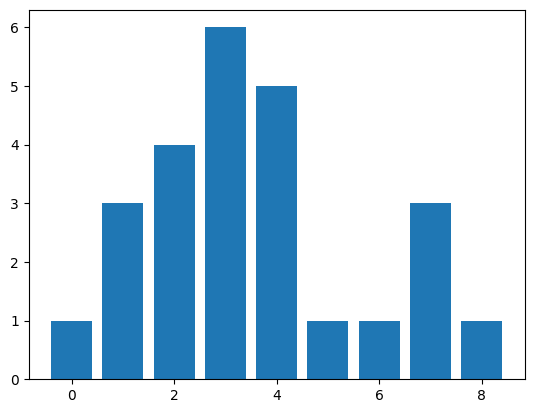

In [13]:
hist = [ 0 for i in range(9)]
for j in range(5) :
    for i in range(5) :
        hist[img[j][i]] += 1
print(hist)
plt.bar(range(9) , hist,)

2 ) 히스토그램 평활화를 위한 매핑 표를 구하시오.

[0, 0, 0, 1, 2, 2, 2, 2, 2]


<BarContainer object of 9 artists>

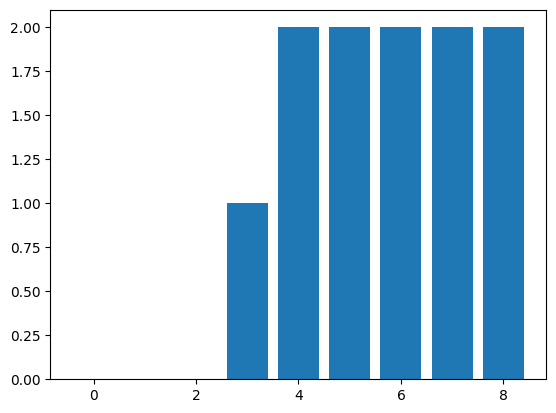

In [22]:
cumsum_hist = [0 for _ in range(9)]
total = 0
for i in range(len(hist)) :
    total += hist[i] 
    cumsum_hist[i] = total // 9
    

print(cumsum_hist)
plt.bar(range(9), cumsum_hist)

3 ) 평활화된 영상을 제시하시오.



In [23]:
new_img = [[0 for _ in range(5)] for _ in range(5)]

for j in range(5) :
    for i in range(5) :
        new_img[j][i] = cumsum_hist[img[j][i]]

print(new_img)

[[0, 0, 0, 0, 0], [0, 0, 1, 2, 1], [0, 1, 2, 2, 1], [2, 2, 2, 2, 2], [1, 2, 2, 2, 1]]


2. 2.3.2절의 연결요소 번호 붙이기 알고리즘에 대해 답하시오.

1 ) [알고리즘 2-5]를 8-연결성 버전으로 바꾸기 위한 flood_fill8() 함수를 제시하시오.

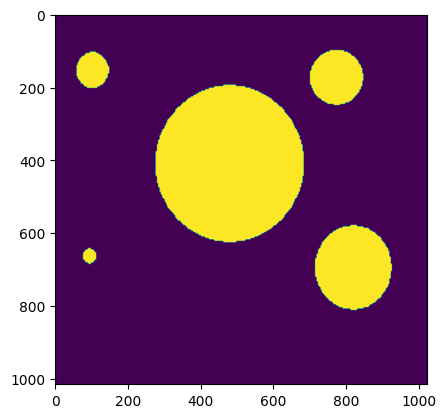

: 

: 

In [3]:

img = cv2.imread('../img/figures.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

plt.imshow(img)
plt.show()

h,w = img.shape[:2]
copy_img = [[0 for _ in range(w)] for _ in range(h)]

for j in range(h) :
    for i in range(w) :
        if img[j][i] == 255 :
            copy_img[j][i] = -1
        else :
            copy_img[j][i] = 0

def flood_fill8(img, y, x, label) :

    if img[y][x] == -1 : 
        img[y][x] = label

        flood_fill8(img, y-1, x-1, label)
        flood_fill8(img, y-1, x, label)
        flood_fill8(img, y-1, x+1, label)
        flood_fill8(img, y, x-1, label)
        flood_fill8(img, y, x+1, label)
        flood_fill8(img, y+1, x-1, label)
        flood_fill8(img, y+1, x, label)
        flood_fill8(img, y+1, x+1, label)



label = 1
for j in range(1, h-2) :
    for i in range(1, w-2) :
        if copy_img[j][i] == -1 :
            flood_fill8(copy_img, j, i, label)
            label += 1

print(np.unique(copy_img))
plt.imshow(copy_img)

2 ) [알고리즘 2-6]을 8-연결성 버전으로 바꾸기 위한 efficient_floodfill8() 함수를 제시하시오.

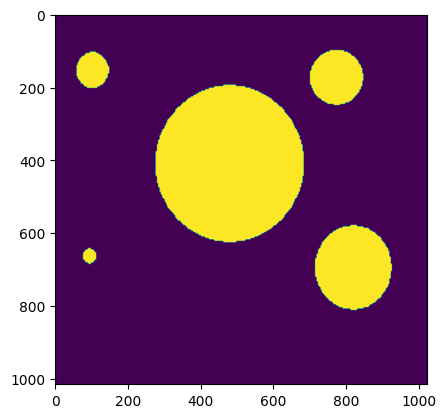

[0 1 2 3 4 5]


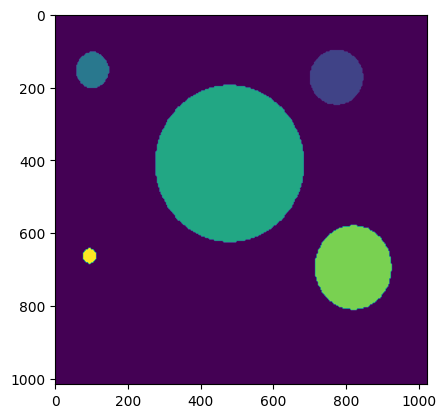

In [7]:

img = cv2.imread('../img/figures.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

plt.imshow(img)
plt.show()

h,w = img.shape[:2]
copy_img = [[0 for _ in range(w)] for _ in range(h)]

for j in range(h) :
    for i in range(w) :
        if img[j][i] == 255 :
            copy_img[j][i] = -1
        else :
            copy_img[j][i] = 0

def efficient_flood_fill8(img, y, x, label) :
    queue = []
    queue.append([y,x])
    while queue :
        (y,x) = queue.pop(0)
        if img[y][x] == -1 :
            left = right = x
            while img[y][left-1] == -1 :
                left -= 1
            while img[y][right+1] == -1 :
                right += 1
            for c in range(left, right+1) :
                img[y][c] = label
                if img[y-1][c] == -1 :# and (c==left or img[y-1][c-1] != -1) :
                    queue.append([y-1, c])
                if img[y+1][c] == -1 : # and (c==left or img[y+1][c-1] != -1) :
                    queue.append([y+1, c])



label = 1
for j in range(1, h-2) :
    for i in range(1, w-2) :
        if copy_img[j][i] == -1 :
            efficient_flood_fill8(copy_img, j, i, label)
            label += 1

print(np.unique(copy_img))
plt.imshow(copy_img)